<a href="https://colab.research.google.com/github/Israel-Garcilazo/EDP1/blob/main/Ecuaci%C3%B3n_de_onda_ID2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Solución de la Ecuación de Onda con Condiciones Iniciales en Forma de Triángulo
Este cuaderno resuelve la ecuación de onda:
$\frac{\partial^2 u}{\partial t^2} = c^2 \frac{\partial^2 u}{\partial x^2} $
con:
- $ c = 1 $, $ L = 1 $
- Condiciones de frontera: $ u(0,t) = 0 $, $ u(1,t) = 0 $
- Condición inicial: desplazamiento en forma de triángulo:

f(x) =
\begin{cases}
  \frac{2k}{L}x, & 0 \leq x < \frac{L}{2} \\
  \frac{2k}{L}(L - x), & \frac{L}{2} \leq x \leq L
\end{cases}

- Velocidad inicial nula: $ \frac{\partial u}{\partial t}(x, 0) = 0 $

Usaremos solución por series de Fourier para obtener:
$
u(x,t) = \sum_{n=1}^{\infty} A_n \sin(n \pi x) \cos(n \pi t)
$
donde los coeficientes $ A_n $ dependen de la condición inicial $ f(x) $.

In [6]:
# Parámetros
import numpy as np
import matplotlib.pyplot as plt

L = 1
c = 1
k = 1.0
N = 1000  # Número de términos de la serie

# Dominio espacial y temporal
x = np.linspace(0, L, 500)
t_vals = np.linspace(0, 2, 5)  # tiempos a graficar

In [7]:
# Definición de la función inicial f(x)
def f(x, k=1.0):
    return np.where(x < L/2, (2 * k / L) * x, (2 * k / L) * (L - x))

In [8]:
# Cálculo de los coeficientes A_n
def A_n(n, k=1.0):
    term1 = (4 * k / (n**2 * np.pi**2)) * np.sin(n * np.pi / 2)
    return term1

In [9]:
# Solución u(x, t)
def u_xt(x, t, k=1.0, N=100):
    sum_series = np.zeros_like(x)
    for n in range(1, N + 1):
        An = A_n(n, k)
        sum_series += An * np.sin(n * np.pi * x) * np.cos(n * np.pi * t)
    return sum_series

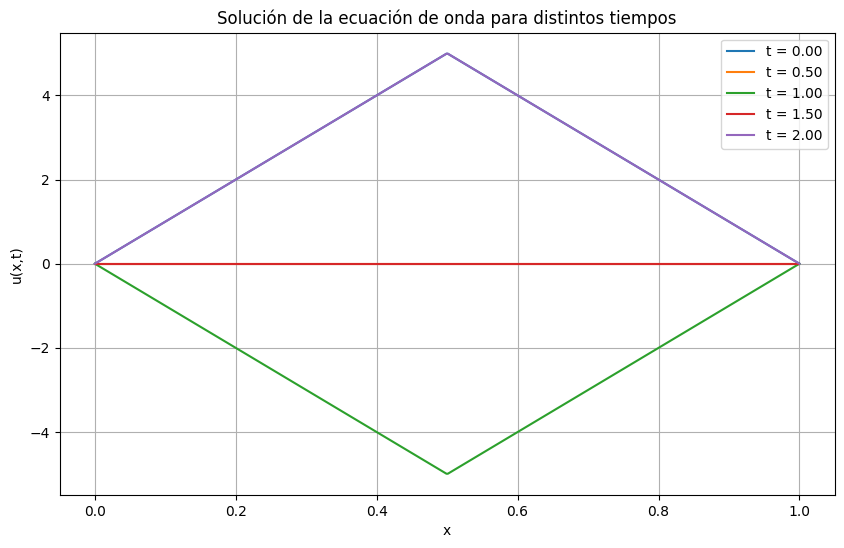

In [10]:
# Graficar la solución u(x, t) para varios tiempos
plt.figure(figsize=(10, 6))

for t in t_vals:
    u = u_xt(x, t, k=k, N=N)
    plt.plot(x, u, label=f"t = {t:.2f}")

plt.title("Solución de la ecuación de onda para distintos tiempos")
plt.xlabel("x")
plt.ylabel("u(x,t)")
plt.grid(True)
plt.legend()
plt.show()